## Artificial Neural Networks (ANN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [4]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [5]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x_1 = LabelEncoder()
X[:,1] = labelencoder_x_1.fit_transform(X[:, 1])
labelencoder_x_2 = LabelEncoder()
X[:,2] = labelencoder_x_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
#https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-find-the-value-for-keras-input_shape-input_dim.md

In [10]:
classifier = Sequential()
# añadimos las capas ocultas:
classifier.add(Dense(6, activation='relu', input_dim=72, input_shape=(16934,)))
# Añadimos una segunda capa
classifier.add(Dense(6, activation='relu'))
# añadimos la capa de salida
classifier.add(Dense(1, activation="sigmoid"))
# Compilamos la ANN
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [11]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 101610    
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 101,659
Trainable params: 101,659
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = classifier.fit(X_train, y_train, epochs=200, verbose=2)

Epoch 1/200
250/250 - 7s - loss: 0.5550 - accuracy: 0.7203 - 7s/epoch - 29ms/step
Epoch 2/200
250/250 - 1s - loss: 0.3803 - accuracy: 0.7960 - 1s/epoch - 5ms/step
Epoch 3/200
250/250 - 1s - loss: 0.2331 - accuracy: 0.8424 - 1s/epoch - 5ms/step
Epoch 4/200
250/250 - 1s - loss: 0.1653 - accuracy: 0.9639 - 1s/epoch - 5ms/step
Epoch 5/200
250/250 - 1s - loss: 0.1923 - accuracy: 0.9342 - 1s/epoch - 6ms/step
Epoch 6/200
250/250 - 1s - loss: 0.0766 - accuracy: 0.9860 - 1s/epoch - 5ms/step
Epoch 7/200
250/250 - 2s - loss: 0.0574 - accuracy: 0.9898 - 2s/epoch - 6ms/step
Epoch 8/200
250/250 - 2s - loss: 0.0479 - accuracy: 0.9909 - 2s/epoch - 7ms/step
Epoch 9/200
250/250 - 2s - loss: 0.0422 - accuracy: 0.9910 - 2s/epoch - 7ms/step
Epoch 10/200
250/250 - 1s - loss: 0.0381 - accuracy: 0.9912 - 1s/epoch - 6ms/step
Epoch 11/200
250/250 - 2s - loss: 0.0364 - accuracy: 0.9910 - 2s/epoch - 7ms/step
Epoch 12/200
250/250 - 1s - loss: 0.0340 - accuracy: 0.9912 - 1s/epoch - 5ms/step
Epoch 13/200
250/250 - 1

Epoch 101/200
250/250 - 1s - loss: 0.0287 - accuracy: 0.9920 - 1s/epoch - 5ms/step
Epoch 102/200
250/250 - 1s - loss: 0.0288 - accuracy: 0.9920 - 1s/epoch - 4ms/step
Epoch 103/200
250/250 - 1s - loss: 0.0288 - accuracy: 0.9920 - 1s/epoch - 5ms/step
Epoch 104/200
250/250 - 1s - loss: 0.0288 - accuracy: 0.9920 - 1s/epoch - 5ms/step
Epoch 105/200
250/250 - 1s - loss: 0.0288 - accuracy: 0.9920 - 1s/epoch - 6ms/step
Epoch 106/200
250/250 - 1s - loss: 0.0288 - accuracy: 0.9920 - 1s/epoch - 5ms/step
Epoch 107/200
250/250 - 1s - loss: 0.0288 - accuracy: 0.9920 - 1s/epoch - 5ms/step
Epoch 108/200
250/250 - 1s - loss: 0.0288 - accuracy: 0.9920 - 1s/epoch - 5ms/step
Epoch 109/200
250/250 - 2s - loss: 0.0288 - accuracy: 0.9920 - 2s/epoch - 6ms/step
Epoch 110/200
250/250 - 1s - loss: 0.0288 - accuracy: 0.9920 - 1s/epoch - 5ms/step
Epoch 111/200
250/250 - 1s - loss: 0.0288 - accuracy: 0.9920 - 1s/epoch - 5ms/step
Epoch 112/200
250/250 - 1s - loss: 0.0288 - accuracy: 0.9920 - 1s/epoch - 5ms/step
Epoc

Epoch 200/200
250/250 - 1s - loss: 0.0288 - accuracy: 0.9920 - 1s/epoch - 5ms/step


In [14]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1594,    1],
       [ 404,    1]], dtype=int64)

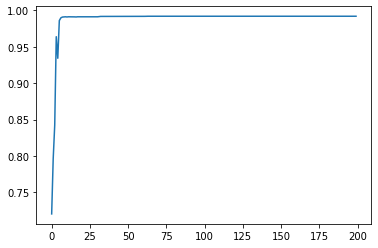

In [16]:
plt.plot(history.history["accuracy"], label="train")
plt.show()

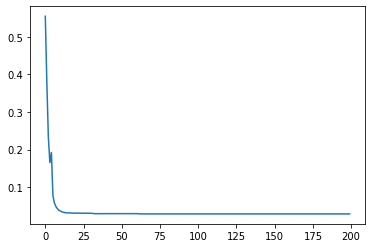

In [17]:
plt.plot(history.history["loss"], label="train")
plt.show()

In [18]:
scores = classifier.evaluate(X_train, y_train)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

250/250 [==============================] - 1s 4ms/step - loss: 0.0287 - accuracy: 0.9920

Accuracy: 99.20%
